In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
from random import randint
warnings.filterwarnings('ignore')

df = pd.read_csv('primary-tumor.data', on_bad_lines='skip', header=None)
df.rename(columns={0: 'class', 1: 'age', 2: 'sex', 3: 'histologic-type', 4: 'degree-of-diffe', 5: 'bone', 6: 'bone-marrow', 7: 'lung', 8: 'pleura', 9: 'peritoneum', 10: 'liver', 11: 'brain', 12: 'skin', 13: 'neck', 14: 'supraclavicular', 15: 'axillar', 16: 'mediastinum', 17: 'abdominal'}, inplace=True)
df.drop(['histologic-type','degree-of-diffe'], axis = 1, inplace=True)

SexIndexes = df.index[df['sex'].str.match('\?')].tolist()
for index in SexIndexes:
  if (df.iloc[index])['class'] == '22' or (df.iloc[index])['class'] == '21' or (df.iloc[index])['class'] == '20' or (df.iloc[index])['class'] == '19':
    df.at[index, 'sex'] = 2
  elif (df.iloc[index])['class'] == '18' or (df.iloc[index])['class'] == '17' or (df.iloc[index])['class'] == '16':
    df.at[index, 'sex'] = 1
  else:
    df.at[index, 'sex'] = randint(1,2)
df['sex'] = pd.to_numeric(df['sex'])

SkinIndexes = df.index[df['skin'].str.match('\?')].tolist()
for index in SkinIndexes:
  df.at[index, 'skin'] = randint(1,2)
df['skin'] = pd.to_numeric(df['skin'])

AxillarIndexes = df.index[df['axillar'].str.match('\?')].tolist()
for index in AxillarIndexes:
  df.at[index, 'axillar'] = randint(1,2)
df['axillar'] = pd.to_numeric(df['axillar'])

scaler = preprocessing.MinMaxScaler()
MinMaxScalerDF = scaler.fit_transform(df)

scaler = preprocessing.StandardScaler()
StandardScalerDF = scaler.fit_transform(df)

scaler = preprocessing.RobustScaler()
RobustDF = scaler.fit_transform(df)

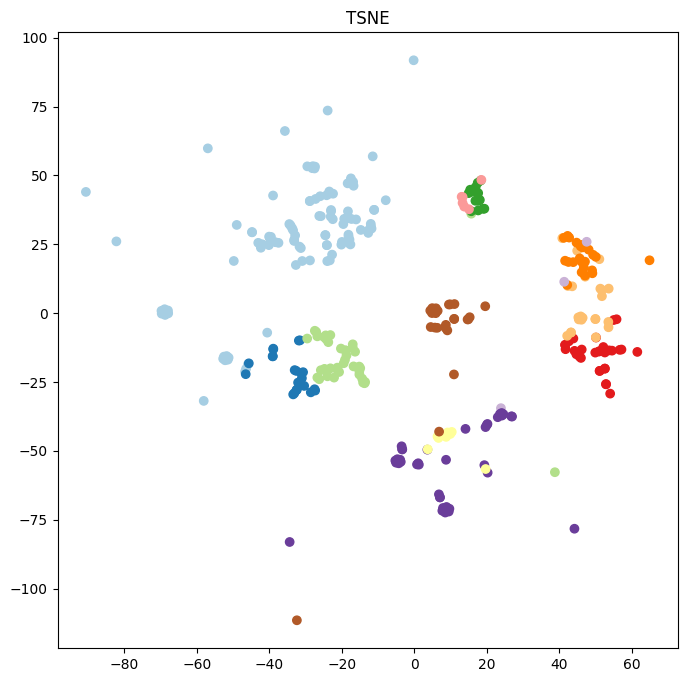

In [ ]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5)
tsne_results = tsne.fit_transform(df.values)

fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE')
ax.scatter(
    x=tsne_results[:,0],
    y=tsne_results[:,1],
    c=df['class'],
    cmap=plt.cm.get_cmap('Paired'))
plt.show()

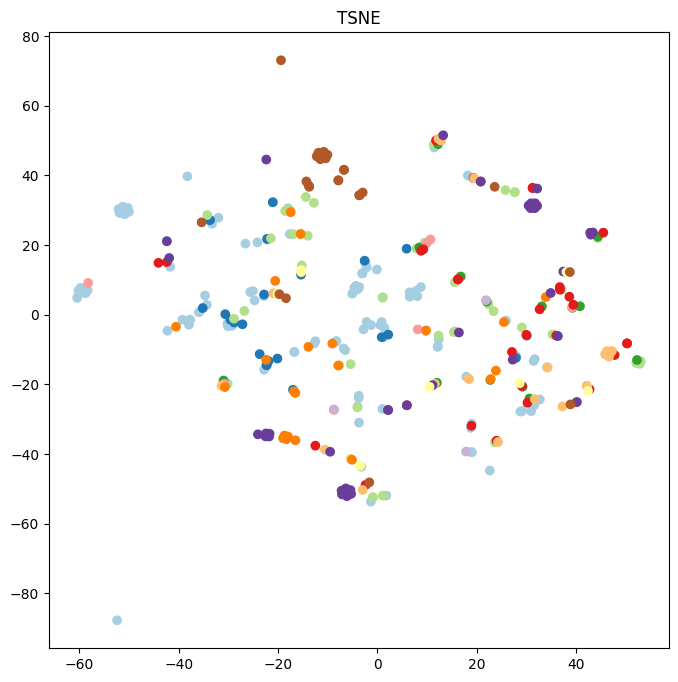

In [ ]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5)
tsne_results = tsne.fit_transform(MinMaxScalerDF)

fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE')
ax.scatter(
    x=tsne_results[:,0],
    y=tsne_results[:,1],
    c=df['class'],
    cmap=plt.cm.get_cmap('Paired'))
plt.show()

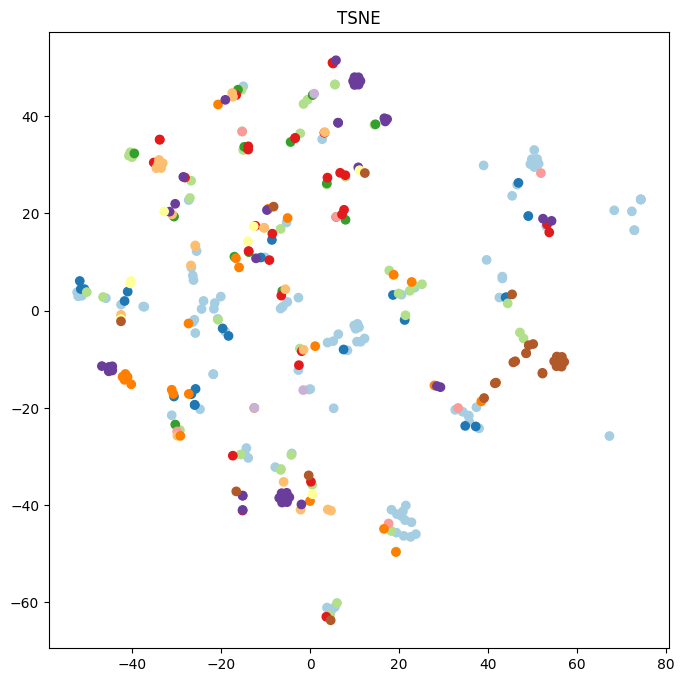

In [ ]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5)
tsne_results = tsne.fit_transform(StandardScalerDF)

fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE')
ax.scatter(
    x=tsne_results[:,0],
    y=tsne_results[:,1],
    c=df['class'],
    cmap=plt.cm.get_cmap('Paired'))
plt.show()

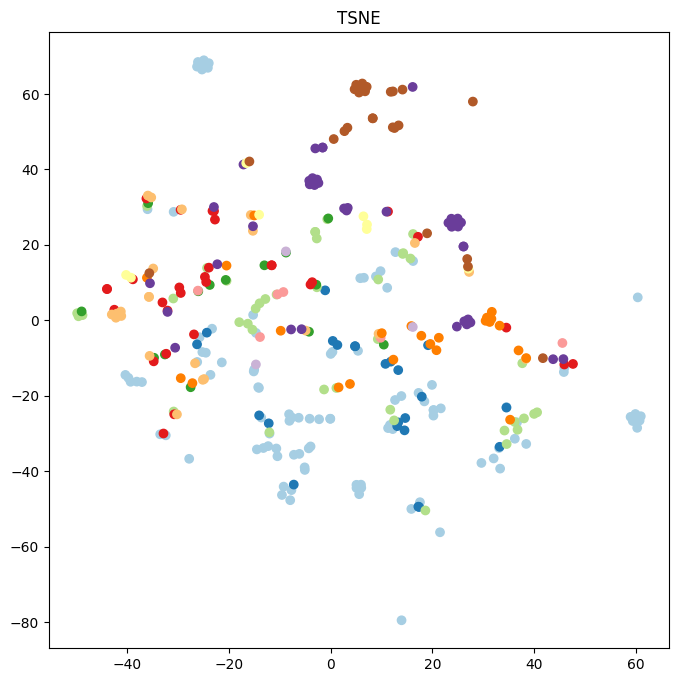

In [ ]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=5)
tsne_results = tsne.fit_transform(RobustDF)

fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE')
ax.scatter(
    x=tsne_results[:,0],
    y=tsne_results[:,1],
    c=df['class'],
    cmap=plt.cm.get_cmap('Paired'))
plt.show()

In [ ]:
!pip install umap-learn
import umap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=f9348ba510f9b4f9b11a672cb31a6a2a7a2e28ae5e70bfd6d392b1478331807e
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=4b30c3b7f8918e3c1d257e3de7ef3dfd842153d667f600c7a995240dd8e531ad
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


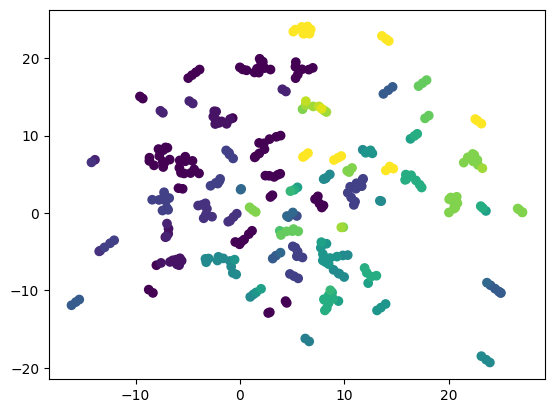

In [ ]:
fit = umap.UMAP(n_neighbors=2, min_dist=0.99)
u = fit.fit_transform(df)

plt.scatter(u[:,0], u[:,1], c=df['class'])

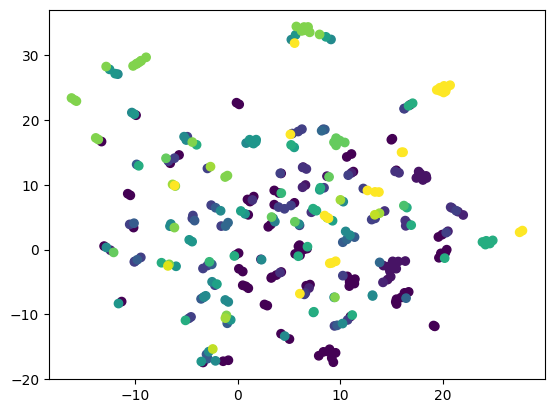

In [ ]:
fit = umap.UMAP(n_neighbors=2, min_dist=0.99)
u = fit.fit_transform(MinMaxScalerDF)

plt.scatter(u[:,0], u[:,1], c=df['class'])

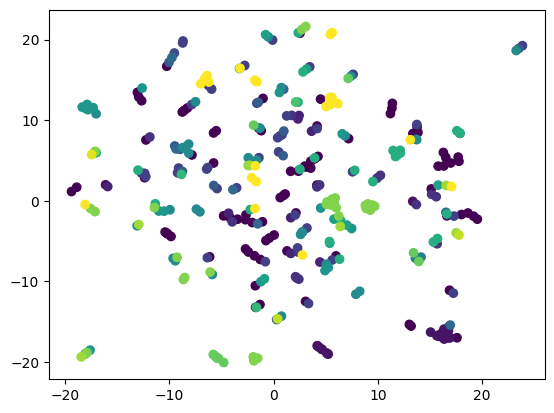

In [ ]:
fit = umap.UMAP(n_neighbors=2, min_dist=0.99)
u = fit.fit_transform(StandardScalerDF)

plt.scatter(u[:,0], u[:,1], c=df['class'])

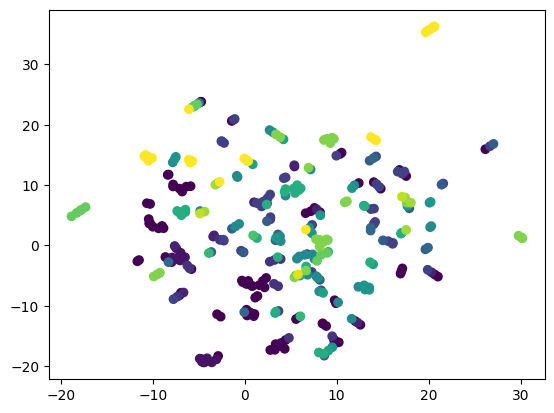

In [ ]:
fit = umap.UMAP(n_neighbors=2, min_dist=0.99)
u = fit.fit_transform(RobustDF)

plt.scatter(u[:,0], u[:,1], c=df['class'])